#Downloaded the fashion_mnist database from keras and shown one images for each category

(60000, 28, 28)


<Figure size 1500x500 with 0 Axes>

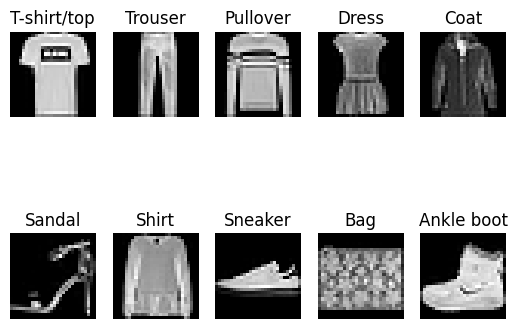

In [38]:

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test,y_test)= fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(x_train.shape)
x_val = x_train[54000:]
y_val = y_train[54000:]
x_train = x_train[:54000]
y_train = y_train[:54000]
# Function to plot one sample image for each class
def plot_samples(images, labels, class_names):
    get_images=[]
    get_labels=[]
    plt.figure(figsize=(15, 5))
    plt.figure(dpi=100)
    unique_labels = np.unique(labels)
    for label in unique_labels:
        # Find the index of the first image with the current label
        index = np.where(labels == label)[0][0]
        get_images.append(images[index])
        get_labels.append(label)
    for i in range(len(unique_labels)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(get_images[i], cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
    plt.show()
# Plot one sample image for each class
plot_samples(x_train, y_train, class_names)


In [39]:
# Vectorise and normalize the data
x_train = x_train.reshape(x_train.shape[0], 784)
x_val  = x_val.reshape(x_val.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print(x_train.shape)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val  = x_val / 255.0

(54000, 784)


In [40]:
# Define the architecture of the neural network
layer_dims = [784,32,64,128,10]  # Number of neurons in each layer, including input and output layers

# Initialize weights and biases
np.random.seed(0)  # For reproducibility
parameters = {}
for l in range(1, len(layer_dims)):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l - 1], layer_dims[l]) * 0.01
    parameters['b' + str(l)] = np.zeros((1, layer_dims[l]))

# Define the sigmoid activation function and softmax function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Define the feedforward propagation
def forward_propagation(X, parameters):
    A = X
    caches = [(None, None)]  # To store intermediate values for each layer (Z, A)
    for l in range(1, len(layer_dims)):
        Z = np.dot(A, parameters['W' + str(l)]) + parameters['b' + str(l)]
        if l == len(layer_dims) - 1:
            A = softmax(Z)
        else:
            A = sigmoid(Z)
        caches.append((Z, A))
    return A, caches

# Perform forward propagation on the training data
predictions, caches = forward_propagation(x_train, parameters)

# Example of how to use the predictions:
# Assuming y_train contains the true labels of the training data
# For example, if you want to calculate the accuracy:
y_prediction=np.argmax(predictions, axis=1)
accuracy = np.mean(y_prediction== y_train)
print("Training Accuracy:", accuracy)


Training Accuracy: 0.10083333333333333


In [41]:
np.sum(y_prediction==y_train)

5445